In [67]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, accuracy_score

In [3]:
heart=pd.read_csv('heart_disease.csv')

In [4]:
heart.columns

Index(['Unnamed: 0', 'age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg',
       'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal', 'present'],
      dtype='object')

In [5]:
heart.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 303 entries, 0 to 302
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  303 non-null    int64  
 1   age         303 non-null    int64  
 2   sex         303 non-null    int64  
 3   cp          303 non-null    int64  
 4   trestbps    303 non-null    int64  
 5   chol        303 non-null    int64  
 6   fbs         303 non-null    int64  
 7   restecg     303 non-null    int64  
 8   thalach     303 non-null    int64  
 9   exang       303 non-null    int64  
 10  oldpeak     303 non-null    float64
 11  slope       303 non-null    int64  
 12  ca          303 non-null    object 
 13  thal        303 non-null    object 
 14  present     303 non-null    int64  
dtypes: float64(1), int64(12), object(2)
memory usage: 35.6+ KB


In [6]:
heart.describe()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,152.000000,54.438944,0.679868,3.158416,131.689769,246.693069,0.148515,0.990099,149.607261,0.326733,1.039604,1.600660,0.458746
std,87.612784,9.038662,0.467299,0.960126,17.599748,51.776918,0.356198,0.994971,22.875003,0.469794,1.161075,0.616226,0.499120
min,1.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000
25%,76.500000,48.000000,0.000000,3.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000
50%,152.000000,56.000000,1.000000,3.000000,130.000000,241.000000,0.000000,1.000000,153.000000,0.000000,0.800000,2.000000,0.000000
75%,227.500000,61.000000,1.000000,4.000000,140.000000,275.000000,0.000000,2.000000,166.000000,1.000000,1.600000,2.000000,1.000000
max,303.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,1.000000


In [8]:
heart.groupby('present').agg(['mean'])
                            

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope
,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
present,,,,,,,,,,,,
0,148.073171,52.585366,0.560976,2.792683,129.250000,242.640244,0.140244,0.835366,158.378049,0.140244,0.586585,1.408537
1,156.633094,56.625899,0.820144,3.589928,134.568345,251.474820,0.158273,1.172662,139.258993,0.546763,1.574101,1.827338


In [9]:
heart.groupby('present').agg(['sum'])

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum,sum
present,,,,,,,,,,,,,,
0,24284,8624,92,458,21197,39793,23,137,25974,23,96.2,231,0.00.00.00.00.00.00.00.00.00.00.00.00.00.00.00...,6.03.03.03.03.06.03.07.07.03.03.03.03.03.03.03...
1,21772,7871,114,499,18705,34955,22,163,19357,76,218.8,254,3.02.02.01.00.01.00.00.02.02.00.02.00.00.01.01...,3.07.03.07.07.06.07.03.07.07.07.07.03.07.06.07...


In [10]:
heart.corr()

,Unnamed: 0,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,present
Unnamed: 0,1.000000,-0.002367,-0.070849,0.003700,-0.022028,-0.095518,-0.039471,-0.150232,-0.105488,-0.000402,-0.120384,-0.028458,0.048765
age,-0.002367,1.000000,-0.097542,0.104139,0.284946,0.208950,0.118530,0.148868,-0.393806,0.091661,0.203805,0.161770,0.223120
sex,-0.070849,-0.097542,1.000000,0.010084,-0.064456,-0.199915,0.047862,0.021647,-0.048663,0.146201,0.102173,0.037533,0.276816
cp,0.003700,0.104139,0.010084,1.000000,-0.036077,0.072319,-0.039975,0.067505,-0.334422,0.384060,0.202277,0.152050,0.414446
trestbps,-0.022028,0.284946,-0.064456,-0.036077,1.000000,0.130120,0.175340,0.146560,-0.045351,0.064762,0.189171,0.117382,0.150825
chol,-0.095518,0.208950,-0.199915,0.072319,0.130120,1.000000,0.009841,0.171043,-0.003432,0.061310,0.046564,-0.004062,0.085164
fbs,-0.039471,0.118530,0.047862,-0.039975,0.175340,0.009841,1.000000,0.069564,-0.007854,0.025665,0.005747,0.059894,0.025264
restecg,-0.150232,0.148868,0.021647,0.067505,0.146560,0.171043,0.069564,1.000000,-0.083389,0.084867,0.114133,0.133946,0.169202
thalach,-0.105488,-0.393806,-0.048663,-0.334422,-0.045351,-0.003432,-0.007854,-0.083389,1.000000,-0.378103,-0.343085,-0.385601,-0.417167
exang,-0.000402,0.091661,0.146201,0.384060,0.064762,0.061310,0.025665,0.084867,-0.378103,1.000000,0.288223,0.257748,0.431894


{'whiskers': [<matplotlib.lines.Line2D at 0x7fc3b08e6a10>,
 'caps': [<matplotlib.lines.Line2D at 0x7fc3b08e6fb0>,
 'boxes': [<matplotlib.lines.Line2D at 0x7fc3b08e6740>],
 'medians': [<matplotlib.lines.Line2D at 0x7fc3b08e7550>],
 'fliers': [<matplotlib.lines.Line2D at 0x7fc3b08e7820>],
 'means': []}

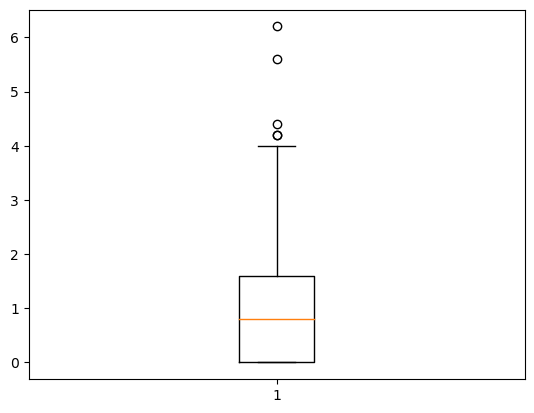

In [6]:
plt.boxplot(heart['oldpeak'])

(array([ 1., 10., 33., 38., 37., 60., 64., 43., 14.,  3.]),
 array([29. , 33.8, 38.6, 43.4, 48.2, 53. , 57.8, 62.6, 67.4, 72.2, 77. ]),
 <BarContainer object of 10 artists>)

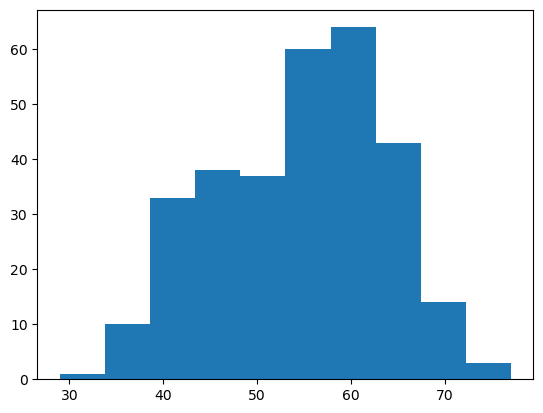

In [7]:
plt.hist(heart['age'])

In [8]:
#we drop the predicators with correlation inferior to 0.2


In [9]:
newdf=heart.drop(['Unnamed: 0','trestbps', 'chol','restecg', 'fbs'], axis=1)

In [10]:
newdf.head()

,age,sex,cp,thalach,exang,oldpeak,slope,ca,thal,present
0,63,1,1,150,0,2.3,3,0.0,6.0,0
1,67,1,4,108,1,1.5,2,3.0,3.0,1
2,67,1,4,129,1,2.6,2,2.0,7.0,1
3,37,1,3,187,0,3.5,3,0.0,3.0,0
4,41,0,2,172,0,1.4,1,0.0,3.0,0


In [20]:
newdf['thal'].value_counts()

3.0    166
7.0    117
6.0     18
?        2
Name: thal, dtype: int64

In [ ]:
# cheking, cleaning and deleting missing values

In [44]:
dfclean=dfclean[dfclean['thal']!='?']

In [45]:
dfclean['thal'].value_counts()

3.0    164
7.0    115
6.0     18
Name: thal, dtype: int64

In [25]:
dfclean=newdf[newdf['ca']!='?']

In [53]:
dfclean=dfclean.replace('?',pd.NA) 
dfclean.dropna(inplace=True) 

In [54]:
X=dfclean.drop('present', axis=1)
y=dfclean['present']

In [29]:
#spliting data into test and train set

In [55]:
X_train, X_test, y_train, y_test=train_test_split(X,y, random_state=22, test_size=0.2)

In [56]:
y.value_counts(normalize=True)

0    0.538721
1    0.461279
Name: present, dtype: float64

In [57]:
y_train.value_counts(normalize=True)

0    0.523207
1    0.476793
Name: present, dtype: float64

In [58]:
y_test.value_counts(normalize=True)

0    0.6
1    0.4
Name: present, dtype: float64

In [37]:
#both train and test set have cases and non-cases with acceptable percentage

In [38]:
#Construct the model

In [62]:
model=LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

In [90]:
accuracytr=model.score(X_train, y_train)

In [91]:
print(accuracytr)

0.8481012658227848


In [65]:
y_predtr=model.predict(X_train)

In [97]:
matconftr=confusion_matrix(y_train, y_predtr)

In [69]:
matconf

array([[110,  14],
       [ 22,  91]])

In [98]:
tn, fp, fn, tp = matconftr.ravel()

In [99]:
senstr=tp/(tp+fn)
spectr=tn/(tn+fp)

In [100]:
print(senstr, spectr)

0.8053097345132744 0.8870967741935484


In [74]:
#model coefficients

In [75]:
coeff=model.coef_

In [82]:
coeff[0]

array([ 0.01230556,  0.81414649,  0.50524074, -0.01647984,  0.90289019,
        0.44593573,  0.25457874,  0.90626537,  0.34616073])

In [78]:
intercept=model.intercept_

In [83]:
intercept

array([-3.88091277])

In [86]:
dfcoeff=pd.DataFrame({'predictors':X_train.columns, 'log-odds':coeff[0], 'odds':np.exp(coeff[0])})

In [87]:
dfcoeff

,predictors,log-odds,odds
0,age,0.012306,1.012382
1,sex,0.814146,2.257248
2,cp,0.505241,1.657384
3,thalach,-0.016480,0.983655
4,exang,0.902890,2.466722
5,oldpeak,0.445936,1.561951
6,slope,0.254579,1.289918
7,ca,0.906265,2.475062
8,thal,0.346161,1.413630


In [88]:
#Final Evaluation

In [93]:
y_predts=model.predict(X_test)

In [94]:
accuracyts=accuracy_score(y_test, y_predts)

In [95]:
print(accuracytr, accuracyts)

0.8481012658227848 0.8833333333333333


In [96]:
#test set give better accuracy

In [101]:
matconfts=confusion_matrix(y_test, y_predts)

In [102]:
tn, fp, fn, tp=matconfts.ravel()

In [103]:
sensts=tp/(tp+fn)
spects=tn/(tn+fp)

In [104]:
print(senstr, sensts, spectr, spects)

0.8053097345132744 0.7916666666666666 0.8870967741935484 0.9444444444444444


In [105]:
#also here the senssivity it's almost the same and the specificity it's much better than the training set

In [ ]:
#the accuracy for this model is acceptabe but we can make better 